In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import random
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [3]:
data = pd.read_csv('exams.csv')

In [4]:
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [5]:
data = pd.get_dummies(data)

In [6]:
data.head(5)

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,59,70,78,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
1,96,93,87,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
2,57,76,77,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
3,70,70,63,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
4,83,85,86,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1


In [7]:
data = data.drop(['test preparation course_none'], axis=1)

In [8]:
data.head()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed
0,59,70,78,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1
1,96,93,87,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0
2,57,76,77,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,70,70,63,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0
4,83,85,86,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0


In [12]:
y = data[['test preparation course_completed']]

In [14]:
X = data.drop(['test preparation course_completed'], axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [29]:
parameters = {'n_neighbors' : range(1, 100, 2), 'p' : range(3), 'leaf_size' : range(1, 100, 5)}

In [30]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, n_jobs=-1, verbose=1)

In [31]:
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits


C:\Users\mrbab\anaconda3\envs\test\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5000 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mrbab\anaconda3\envs\test\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mrbab\anaconda3\envs\test\lib\site-packages\sklearn\neighbors\_classification.py", line 213, in fit
    self._validate_params()
  File "C:\Users\mrbab\anaconda3\envs\test\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constr

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': range(1, 100, 5),
                         'n_neighbors': range(1, 100, 2), 'p': range(0, 3)},
             verbose=1)

In [32]:
grid_search_cv.best_params_

{'leaf_size': 1, 'n_neighbors': 15, 'p': 1}

In [33]:
best_clf = grid_search_cv.best_estimator_

In [34]:
y_pred = best_clf.predict(X_test)

In [35]:
precision_score(y_test, y_pred)

0.7321428571428571

In [36]:
recall_score(y_test, y_pred)

0.3416666666666667

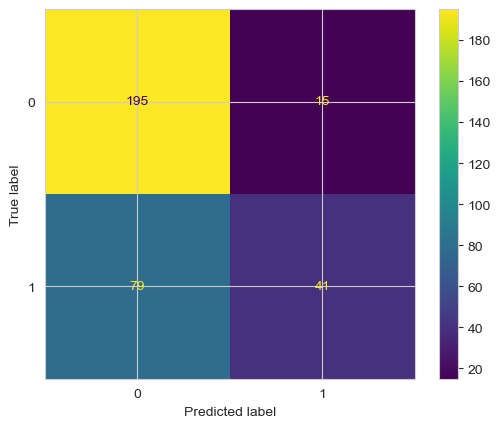

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()

In [38]:
conf_matrix

array([[195,  15],
       [ 79,  41]], dtype=int64)

In [41]:
result = pd.concat([X_test.reset_index(drop=True),
                    y_test.reset_index(drop=True),
                    pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)

In [44]:
result.head(10)

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,y_pred
0,83,74,80,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1
1,94,75,75,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,44,56,47,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,48,46,50,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,62,78,71,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0
5,59,66,69,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
6,70,66,59,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
7,80,80,83,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0
8,58,62,54,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
9,76,81,72,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0


(1000, 19)